# Predicting Heart Disease Using Machine Learning

This notebook uses different python libraries of machine learning, data science in  attempt to build machine learning model predicting wheather any someone has heart disease or not based on their medical attributes.

we are going to take following approach:
1. Problem definition.
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Definition
In a statement,

>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
>The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

>There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
>This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
* thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

#Regular EDA (Exploratory data analysis) ad plotting librarie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here to get more familiear with data and become subject matter expert.
1. what question are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add or remove features to get more about your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

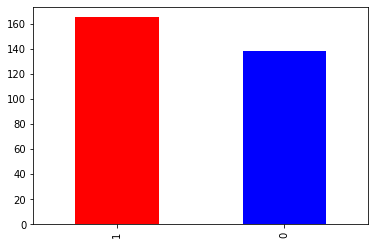

In [6]:
df["target"].value_counts().plot(kind='bar', color = ["red", "blue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


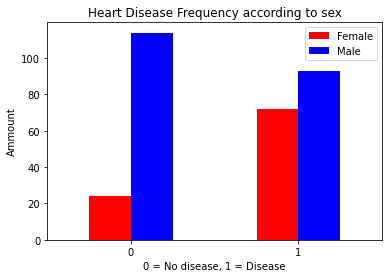

In [12]:
# create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind='bar', color= ['red', 'blue']);
plt.title("Heart Disease Frequency according to sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Ammount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);# x label chy value saral karte

### Age vs Max Heart Rate for Heart Disease

In [13]:
df["thalach"].value_counts() #length indicates how many values in data

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

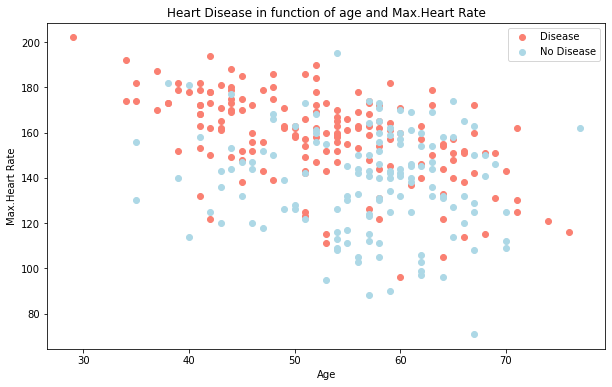

In [14]:
# create another figure
plt.figure(figsize=(10,6));

# Scatter with positive samples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon');

# Scatter with negative samples
plt.scatter(df.age[df['target']==0],
           df.thalach[df.target==0],
           c='lightblue');

# Add some helpful info
plt.title("Heart Disease in function of age and Max.Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max.Heart Rate");
plt.legend(['Disease', 'No Disease']);

In [15]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

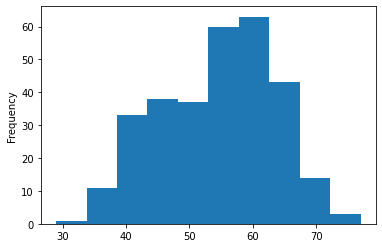

In [16]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Freqency per chest pain type

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


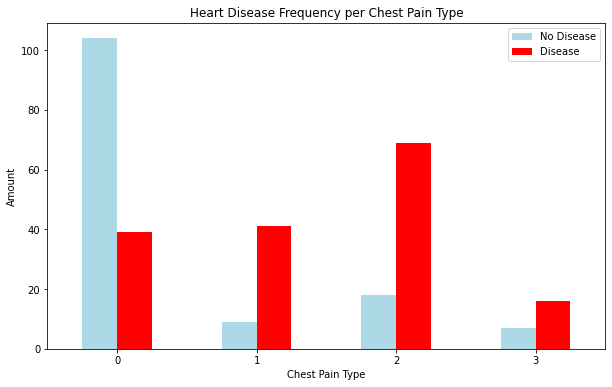

In [18]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color = ['lightblue','red']);

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel("Chest Pain Type")
plt.ylabel('Amount')
plt.xticks(rotation = 0);
plt.legend(['No Disease', 'Disease']);

In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


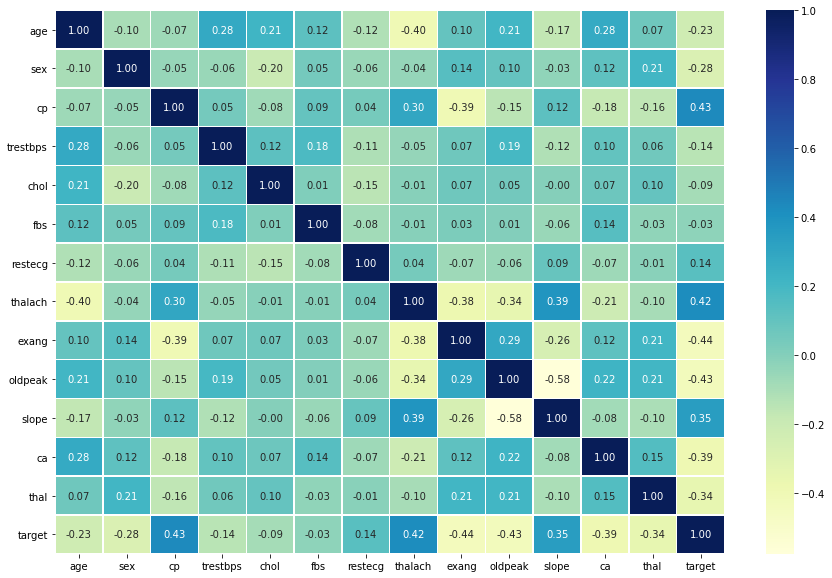

In [20]:
# Let's make correlation visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidths=0.5,
                fmt = '.2f',
                cmap='YlGnBu');

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# split the data in x and y
x = df.drop('target', axis = 1)
y = df.target


In [23]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# split data into train and test set
np.random.seed(42)
# split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

we'er going to try 3 different machine learning models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random forest Classifier


In [28]:
# put models in dictonary
models = {"Logistic Regression": LogisticRegression(solver="liblinear"),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    '''
    Fits and evaluate given machine Learning models.
    model: a dict of different sklearn machine learning models
    x_train: training data(no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test: test labels
    '''
#     set random seed
    np.random.seed(42)
#     make dict to keep model scores
    model_scores = {}
#     loop through models
    for name, model in models.items():
        # fit the model to data
        model.fit(X_train,Y_train)
        #evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

In [29]:
ml_score = fit_and_score(models,
                        x_train,
                        x_test,
                        y_train,
                        y_test)
ml_score

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

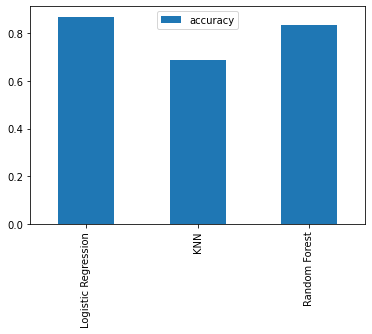

In [30]:
# visula model score compare
model_compare = pd.DataFrame(ml_score, index=["accuracy"])
model_compare.T.plot.bar();

Now we got baseline model.. and we know first prediction aren't always what we should based our next step off. what should do?

Let's look at the following:
* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1-Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

## Hyperparameter Tunning (By hand)

In [31]:
# Let's tune KNN
train_score = []
test_score = []

# create a list of different values for n_neighbours
neighbors = range(1, 21)
# setup KNN instance
knn = KNeighborsClassifier() 
# loop through different n-neighbors
for i in neighbors:
    #tunning the hyperparameter
    knn.set_params(n_neighbors = i)
#     fit algorithm
    knn.fit(x_train, y_train)
    # update the training score
    train_score.append(knn.score(x_train,y_train))
    # update the test score
    test_score.append(knn.score(x_test,y_test))

In [32]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


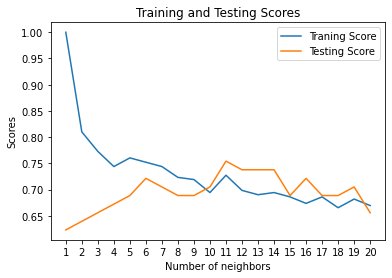

In [34]:
plt.plot(neighbors, train_score, label="Train score");
plt.plot(neighbors, test_score, label = "Test score");
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.title("Training and Testing Scores");
plt.legend(["Traning Score", "Testing Score"]);

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

## Hyperparameter Tunning with RandomizedSearchCV

we're going to tune:
* LogiscticRegression()
* RandomForestClassifier()

In [35]:
# create a hyperparemeter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(start = -4, stop = 4, num = 20),
               "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,100,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


'''
verbose  = By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:

'''
LogisticRegression()

# tune Logistic Regression Model
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fitting random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [38]:
# tune RandomForset model
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose=True)
rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [40]:
rs_rf.score(x_test,y_test)

0.819672131147541

In [41]:
ml_score

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tunning with GridSearchCV

since our logistic regression provides best result hance we improve the logistic regression

In [42]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [45]:
ml_score

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tunned machine learning classifer, beyond accuracy

* ROC curve and AUC curve
* confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

... and it would be great if cross-validation was used where possible.

In [46]:
# Make predictions
y_preds = gs_log_reg.predict(x_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

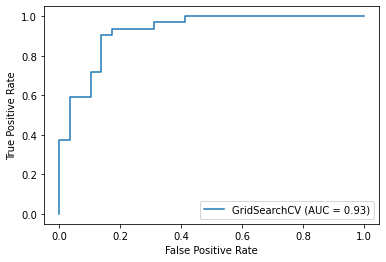

In [49]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

In [50]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


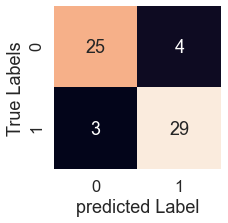

In [51]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    '''
    plots a nice looking confusion matrix using seaborn's heatmap().
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("predicted Label")
    plt.ylabel("True Labels")
    
plot_conf_mat(y_test, y_preds)
    

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation matrix using cross-validation
* we use cross-val score

In [53]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [55]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                         cv = 5,
                        scoring = "accuracy")

cv_acc


array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
# cross validated precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [58]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [59]:
# cross vlidated f1-score

cv_f1_score = cross_val_score(clf, x, y, cv = 5, scoring = "f1")
cv_f1_score

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [60]:
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [61]:
# cross validating recall
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [62]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

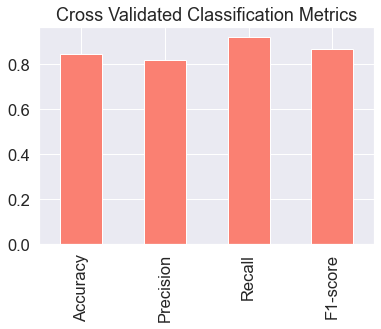

In [63]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision":cv_precision,
                          "Recall": cv_recall,
                          "F1-score": cv_f1_score},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",
                   legend = False, color = "salmon");

### Feature Importance

"Features importance is another as asking, "Which featurs contributed most to outcomes of model and how did they contribute?"

Finding feature importance is different for each model

In [64]:
# Feture importance for Logistic Regression
# 1. Fit an instance of Logistic regression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
clf.coef_

array([[ 0.00316728, -0.86044655,  0.66067042, -0.01156993, -0.00166374,
         0.04386109,  0.31275847,  0.02459361, -0.60413083, -0.56862804,
         0.4505163 , -0.63609898, -0.67663378]])

In [67]:
# match the coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict                                             

{'age': 0.0031672809701328098,
 'sex': -0.8604465542018854,
 'cp': 0.6606704161071124,
 'trestbps': -0.011569931839584581,
 'chol': -0.0016637442846940298,
 'fbs': 0.043861090099753856,
 'restecg': 0.3127584688139112,
 'thalach': 0.024593614036076978,
 'exang': -0.6041308274033194,
 'oldpeak': -0.5686280446250761,
 'slope': 0.45051629703183155,
 'ca': -0.6360989766185763,
 'thal': -0.6766337834775279}

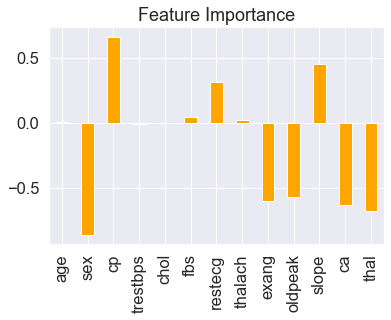

In [68]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, color = "orange");

## 6.Experimentation

If our model cannot achive the decided target then we can do experimetations by asking some question to ourselfs like as follows :

    * can we give more data or cut some unwanted data?
    * try another models such as XGboost,  Catboost.
    * ask help from others
    * reserch on your topic
    * went to subject matter expert and get some information.